In [4]:
# :simp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
# import sqlite3
# import mysql.connector as cnt
# import plotly.express as px

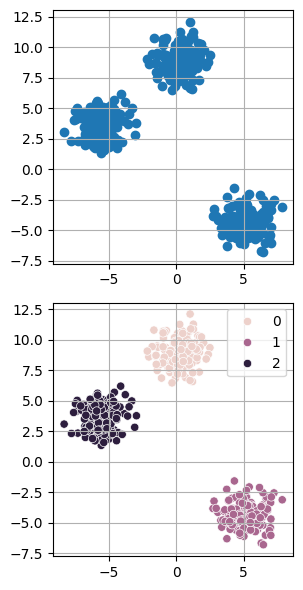

In [7]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=23)

fig, (ax1, ax2) = plt.subplots(2,gridspec_kw={'height_ratios':[1,1]},figsize=[3,6])

ax1.scatter(X[:,0], X[:,1])
ax1.grid(True)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, ax=ax2)
ax2.grid(True)

fig.tight_layout()
plt.show()

In [8]:
from sklearn.model_selection import GridSearchCV # su gridsearchcv tuninsime parametrus
from sklearn.cluster import KMeans

# Define the parameter grid
param_grid = {
    'n_clusters': range(2, 6 + 1),
    'init': ['k-means++', 'random'],
    'n_init': [5, 10, 15],
    'max_iter': [100, 200, 300, 400, 500],
    'tol': [0.0001, 0.001, 0.01],
    'algorithm': ['auto', 'full', 'elkan'],
    'random_state': [0, 42, 100]
}
 
# Create the KMeans object
kmeans = KMeans(random_state=42)
 
# Perform grid search
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5, n_jobs=-1)
 
# Fit the grid search to the data
grid_search.fit(X) # fitinam X, kurį susigeneravom darbo pradžioje
 
# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)
print('Optimal number of clusters based on parameter grid: ' + str(grid_search.best_params_['n_clusters']))


Best hyperparameters:  {'algorithm': 'elkan', 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 6, 'n_init': 15, 'random_state': 42, 'tol': 0.001}
Optimal number of clusters based on parameter grid: 6
